# DS-SF-34 | Unit Project | 2 | Exploratory Data Analysis | Starter Code

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our modeling exercise in Unit Project 3.

First, load the python libraries you will need for this project:

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

Then, read in your dataset:

In [3]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'dataset-ucla-admissions.csv'))

df

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
...,...,...,...,...
395,0,620.0,4.00,2.0
396,0,560.0,3.04,3.0
397,0,460.0,2.63,2.0
398,0,700.0,3.65,2.0


## Questions

> ### Question 1.  How many observations are in our dataset?

In [3]:
# TODO
df.shape

(400, 4)

Answer: TODO

400


> ### Question 2.  Create a summary table.

In [4]:
# TODO
df.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


> ### Question 3.  Why would `gre` have a larger variance than `gpa`?

In [5]:
# TODO
df.var()

admit           0.217237
gre         13369.953040
gpa             0.144879
prestige        0.893654
dtype: float64

Answer: TODO
variance is the expectation of the squared deviation of a random variable from its mean, and it informally measures how far a set of (random) numbers are spread out from their mean. The gpa is in a small interval like (0,4). But GRE is in a larege interval (0,800). So the distance that random variables from the mean is more bigger.

> ### Question 4.  Drop data points with missing data.

In [13]:
# TODO
df.dropna()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
...,...,...,...,...
395,0,620.0,4.00,2.0
396,0,560.0,3.04,3.0
397,0,460.0,2.63,2.0
398,0,700.0,3.65,2.0


> ### Question 5.  Confirm that you dropped the correct data.  How can you tell?

In [14]:
# TODO
sum([True for idx,row in df.iterrows() if any(row.isnull())])

3

In [16]:
null_data = df[df.isnull().any(axis=1)]
null_data

,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
212,0,NaN,2.87,2.0
236,1,660.0,NaN,NaN


Answer: TODO

As the result, there are 3 rows with the null value.


> ### Question 6.  Create boxplots for `gre` and `gpa`.

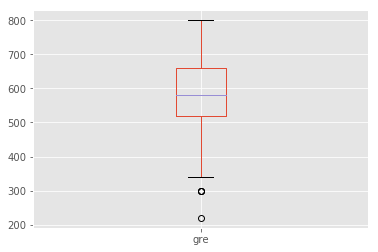

In [17]:
# TODO
df.gre.plot(kind = 'box')

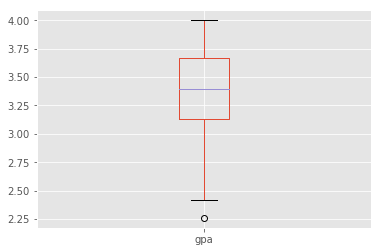

In [18]:
# TODO
df.gpa.plot(kind = 'box')

> ### Question 7.  What do boxplots show?

Answer: TODO

The gre scoers range from 800 to nearly 350, thought there are some outliers as low as 210.
The gpa scores range from nearly 2.4 to 4, though there are some outliers as low as 2.25.

> ### Question 8.  Plot the distribution of each variable.

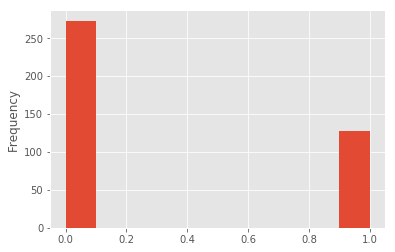

In [19]:
# TODO
df.admit.plot(kind ='hist')

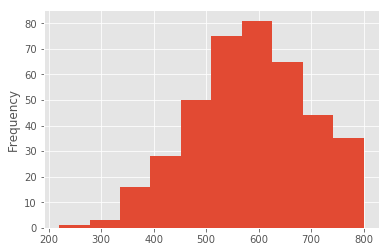

In [20]:
# TODO
df.gre.plot(kind ='hist')

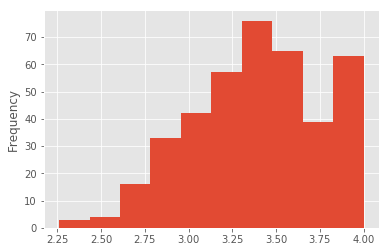

In [21]:
# TODO
df.gpa.plot(kind ='hist')

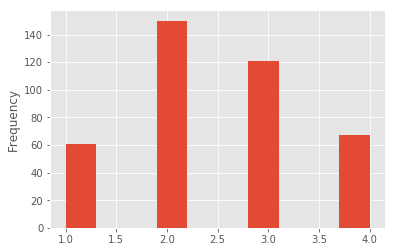

In [22]:
# TODO
df.prestige.plot(kind ='hist')

> ### Question 9.  If our model had an assumption of a normal distribution for `gre` and `gpa`, would we meet that requirement?  Would their distributions need correction?  If so, why, why not?  How?

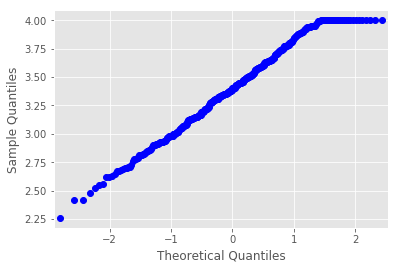

In [19]:
sm.qqplot(df.gpa, line ='s')
plt.show()

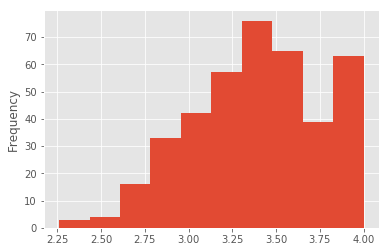

In [18]:
df.gpa.plot(kind = 'hist')

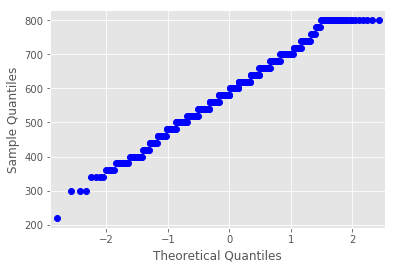

In [14]:
sm.qqplot(df.gre, line= None ,fit = False)
plt.show()

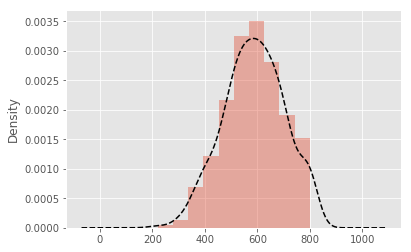

In [26]:
# TODO
df.gre.hist(alpha = .4, normed = True)
df.gre.plot(kind ='kde', style = 'k--')

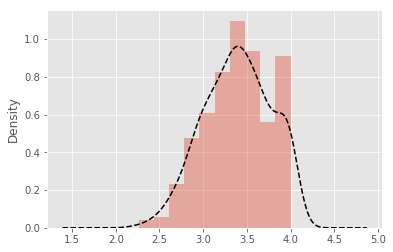

In [27]:
# TODO
df.gpa.hist(alpha = .4, normed = True)
df.gpa.plot(kind ='kde', style = 'k--')

Answer: TODO

The gre and the gpa don't follow the normal distribution according to our visualization. Bothe of them are skewed right. 

We have several solutions. we can either find another distribution they might follow to, or normalize them to fit the normal distribution. 


> ### Question 10.  Create a correlation matrix for the dataset.

In [28]:
# TODO
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


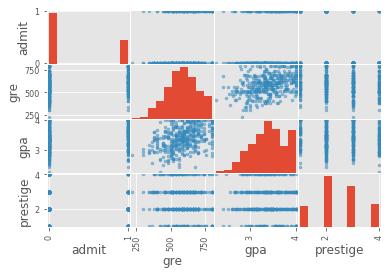

In [22]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df)
plt.show()

> ### Question 11.  What did you find?  Which of our variables are potentially colinear?

Answer: TODO

The gre and the gpa play almaost the same role in the admission process. They are positively corelated to the admit.
The presitige plays a more powerful role since the absolute value of it's corr to the admit is larger than other two factors. However, the prestige scoer is negetively corelated. The higher prestige score is, the worse school you went, the lower probability that you will get admitted by the UCLA.

> ### Question 12.  Write an analysis plan for exploring the association between graduate school admission rates and prestige of undergraduate schools.

Answer: TODO

1.Clean and parse the data into training set and the test set.
2.Choose the right analytical method( linear regression).
3.Estimate coefficients of the equation. 
4.Test the coefficients and the goodnee of the fit.
5.Validate the model by using the test data set.

> ### Question 13.  What is your hypothesis?

Answer: TODO

H0: The coefficent in front of the prestige equals 0. ( The prestige is not corelated to the admit)
Ha: The coefficent in front of the prestige doesn't equal to 0. (The prestige is  corelated to the admit)